# Riddler Express
To go from one generation to the next, you consider every square’s eight neighbors (up, down, left, right and the four diagonal directions). If at least three of those squares are shaded, in the previous iteration, that square will be shaded in the next generation.

That said, here are the first four generations:

<img src='https://fivethirtyeight.com/wp-content/uploads/2022/01/Screen-Shot-2022-01-24-at-8.15.23-PM.png?w=700'>

How many squares will be shaded in generation 10?



In [60]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import itertools

In [61]:
d_neighbors = [
             [0, 1],
             [0, -1],
             [1, -1],
             [1, 0],
             [1, 1],
             [-1, -1],
             [-1, 0],
             [-1, 1]]

class Grid:
  def __init__(self, n):
    if n % 2 == 0:
      # even
      self.dim = n + 1
    else:
      self.dim = n
    
    self.minX = self.dim
    self.maxX = 0
    self.minY = self.dim
    self.maxY = 0

    mid = self.dim // 2

    self.grid = np.zeros((self.dim, self.dim))
    self.grid[mid, mid-1:mid+2] = 1
    self.grid[mid-1:mid+2, mid] = 1
    
    self.generation = 0
    self.cmap = mpl.colors.ListedColormap(['white', 'lightblue', 'blue'])
    self.can_step = True
    self.get_metrics()

  def get_metrics(self):
    self.colored = np.count_nonzero(self.grid == 1)
    self.frontier = set()
    self.visited = set()
    
    for i, j in itertools.product(range(self.dim), range(self.dim)):
      if self.grid[i, j] == 1:
        self.visited.add((i, j))
      neighbors = self.get_neighbors(i, j)
      for (ni, nj) in neighbors:
        if self.grid[ni, nj] == 1 and self.grid[i, j] == 0:
          self.grid[i, j] = 0.5
          self.frontier.add((i, j))
          self.update(i, j)
    
    if self.minX == 0 or self.maxX == self.dim or self.minY == 0 or self.maxY == self.dim:
      self.can_step = False

  def get_neighbors(self, i, j):
    return [(i+di, j+dj) for (di, dj) in d_neighbors if 0 <= i+di < self.dim and 0 <= j + dj < self.dim]

  def update(self, i, j):
    self.maxX = max(self.maxX, i)  
    self.minX = min(self.minX, i)
    self.maxY = max(self.maxY, j)  
    self.minY = min(self.minY, j)

  def vis(self):
    plt.imshow(self.grid, cmap = self.cmap)
    plt.title("Generation {}".format(self.generation), fontweight ="bold")
    plt.show()

  def step(self):
    if self.can_step:
      self.generation += 1
      
      add_frontier = set()
      remove_frontier = set()
      new_grid = np.copy(self.grid)

      for i, j in self.frontier:
        neighbors = self.get_neighbors(i, j)
        if sum([int(self.grid[ni, nj]) for ni, nj in neighbors]) >= 3:
          # shade
          self.colored += 1
          new_grid[i, j] = 1

          # remove frontier
          remove_frontier.add((i, j))

          for ni, nj in neighbors:
            if new_grid[ni, nj] == 0:
              new_grid[ni, nj] = 0.5
              add_frontier.add((ni, nj))
              self.update(ni, nj)
      
      self.frontier = self.frontier - remove_frontier | add_frontier
      self.grid = new_grid
      
    if self.minX == 0 or self.maxX == self.dim or self.minY == 0 or self.maxY == self.dim:
      self.can_step = False

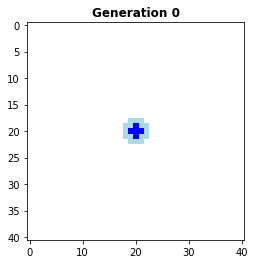

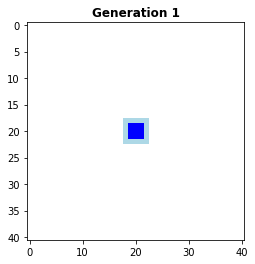

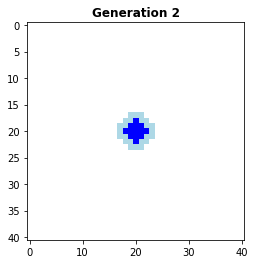

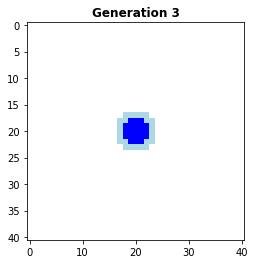

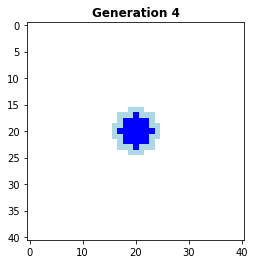

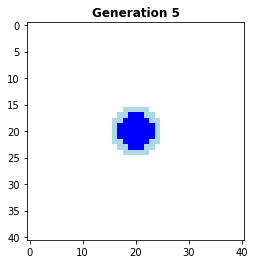

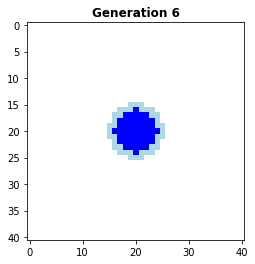

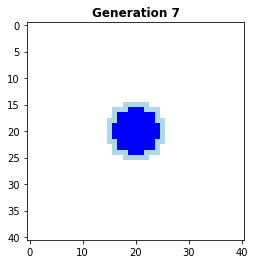

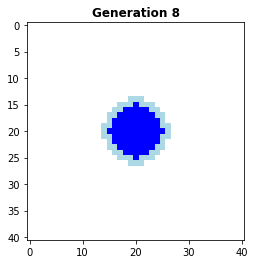

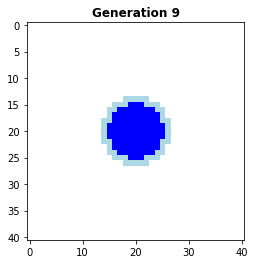

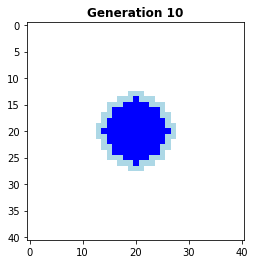

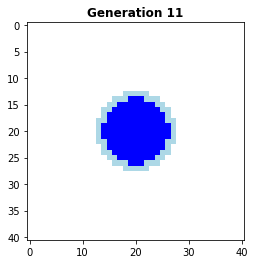

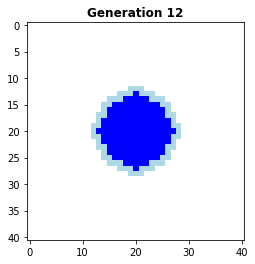

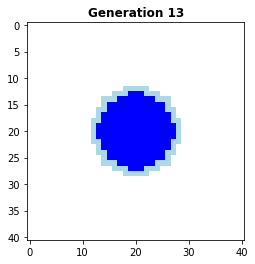

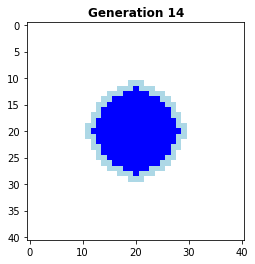

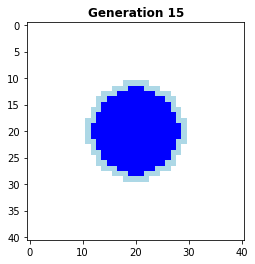

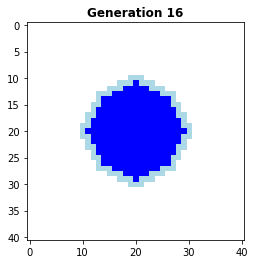

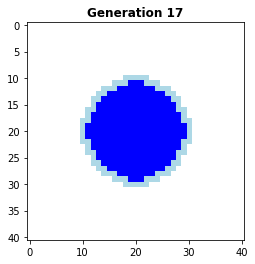

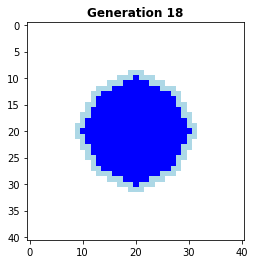

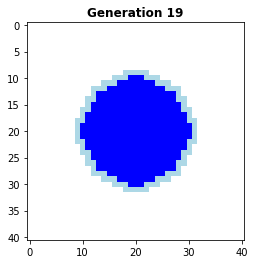

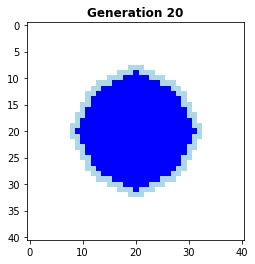

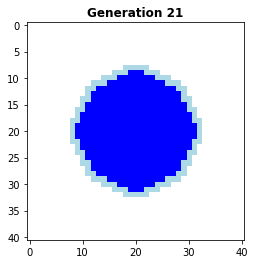

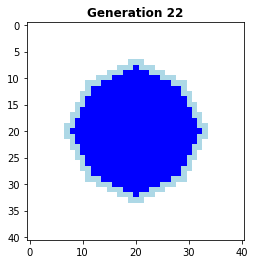

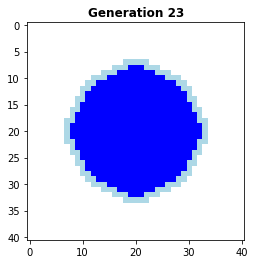

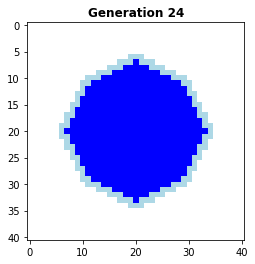

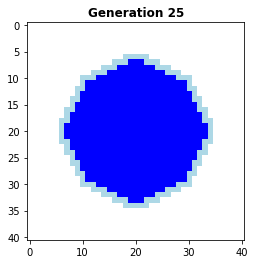

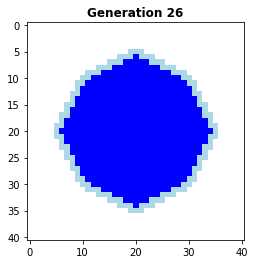

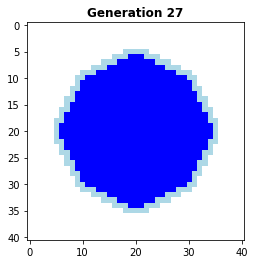

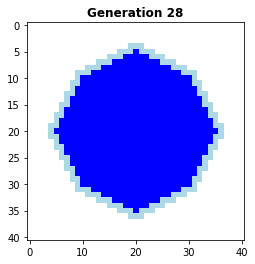

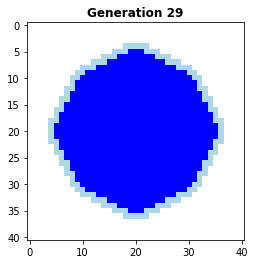

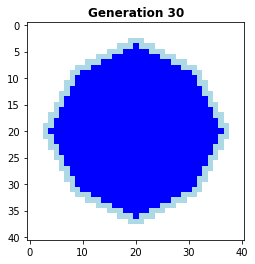

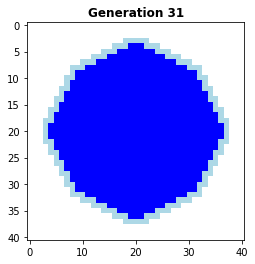

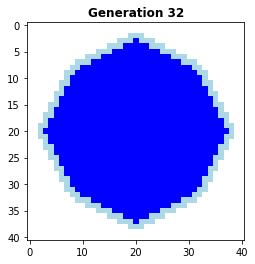

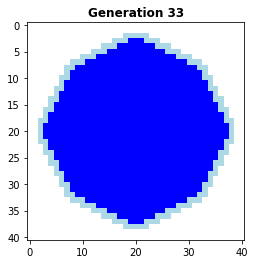

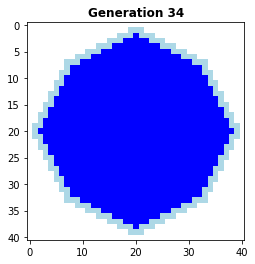

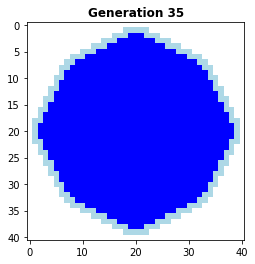

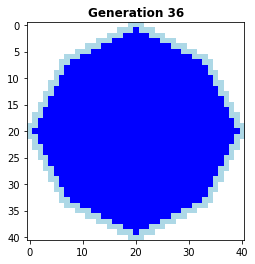

In [62]:
grid = Grid(41)

grid.vis()

colored_list = [grid.colored]

while grid.can_step:
  grid.step()
  grid.vis()
  colored_list.append(grid.colored)

Text(0, 0.5, 'Colored Panel Count')

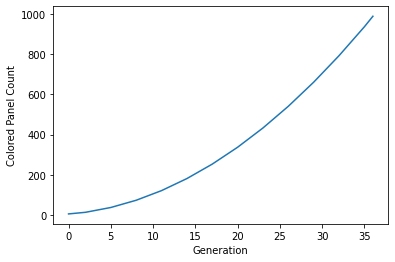

In [39]:
plt.plot(range(len(colored_list)), colored_list)
plt.xlabel("Generation")
plt.ylabel("Colored Panel Count")

We see exponential growth.

# Riddler Classic

You want to change the transmission fluid in your old van, which holds 12 quarts of fluid. At the moment, all 12 quarts are “old.” But changing all 12 quarts at once carries a risk of transmission failure.

Instead, you decide to replace the fluid a little bit at a time. Each month, you remove one quart of old fluid, add one quart of fresh fluid and then drive the van to thoroughly mix up the fluid. (I have no idea if this is mechanically sound, but I’ll take Travis’s word on this!) Unfortunately, after precisely one year of use, what was once fresh transmission fluid officially turns “old.”

You keep up this process for many, many years. One day, immediately after replacing a quart of fluid, you decide to check your transmission. What percent of the fluid is old?

This can be solved easier through a simple equation. After many years, we can assume that the ratio of the old to total fluid has stabilized, meaning that each new month adding new fluid does not change the ratio. Then we can make an equation with parameter $p$ as the percentage of old fluid.

$$
p = \frac{11}{12}\times p + \frac{1}{12} \times \frac{11}{12}^{12}
$$

Solving the equation gives us around 0.35

In [48]:
class Fluid:
  def __init__(self, p):
    self.old = p
    self.new = 1 - p
    self.t = -1
    self.decay = 1/12 * pow(11/12, 12)
    self.old_list = [p]
    self.new_list = [1 - p]

  def step(self):
    self.t += 1

    # remove 1 / 12
    self.old *= 11/12
    self.new *= 11/12

    # add new 1 / 12
    self.new += 1/12

    # 12-month old new -> old
    if self.t >= 12:
      self.new -= self.decay
      self.old += self.decay

    self.old_list.append(self.old)
    self.new_list.append(self.new)

    assert np.isclose(1.0, self.new + self.old)

  def vis(self):
    x = range(-1, self.t+1)

    plt.bar (x, self.new_list ,color='b')
    plt.bar(x, self.old_list, color='r', bottom=self.new_list)
    plt.show()

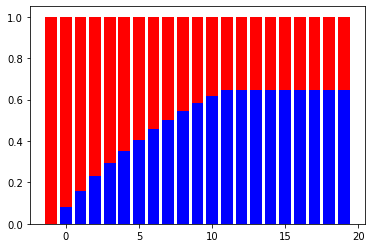

In [56]:
fluid = Fluid(1.0)

for _ in range(20):
  fluid.step()

fluid.vis()

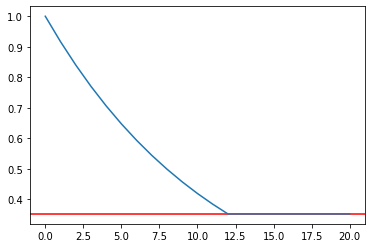

In [59]:
plt.axhline(y=pow(11/12, 12), xmin=-1, xmax=fluid.t-1, color='r')
plt.plot(fluid.old_list)

In [58]:
pow(11/12, 12)

0.3519956280141369